# Linear Regression Homework

In [588]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

random_state = 12345

## Task 1
Using the Housing dataset attached, upload the dataset into your coding environment.

In [589]:
df = pd.read_csv('datasets/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


## Task 2
Use the .info() function to get a summary of the dataset

In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [591]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Observation:
There are 10 columns and 20640 rows in the dataset. Each row describes an area (a block of buildings).

The columns in the dataset are:
* `longitude` - a coordinate that specifies the east–west position of the area
* `latitude` - a coordinate that specifies the north–south position of the area
* `housing_median_age` - the median age of the building in the area
* `total_rooms` - total number of rooms in the area
* `total_bedrooms` - total number of bedrooms in the area
* `population` - total number of people living in the area
* `households` - total number of housing units in the area
* `median_income` - the median income in the area
* `median_house_value` - the median house value in the area
* `ocean_proximity` - the location of the building relative to the ocean

There are 9 numeric columns and 1 column (`ocean_proximity`) that has object datatype.

The column `total_bedrooms` contains `null` values.

## Task 3
Use .isna() and .sum() to find out how many missing values there are in each column.

In [592]:
df.isna().sum().sort_values(ascending=False)

total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Observation

There are 207 missing values in `total_bedrooms` column.

## Task 4
What defines whether a column is a categorical column or a numerical column?

### Answer
The column's datatype defines whether a column is categorical or numerical.

## Task 5
In this dataset, which columns are categorical columns and which columns are numerical columns?

In [593]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
ocean_proximity        object
dtype: object

### Observation:
**Numeric** columns:
- `longitude`, `latitude`, `total_bedrooms`, `median_income` have **float64** datatype.
- `housing_median_age`, `total_rooms`, `population`, `households`, `median_house_value` have **int64** datatype

**Categorical column**:
- `ocean_proximity` has **object** datatype

## Task 6
Use encoding to convert the categorical columns into numerical columns, if it makes sense to do so. (When a categorical column is an ID column, for example, it doesn’t make sense to encode that column.)

Let's look at the unique values in `ocean_proximity` column.

In [594]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Let's explore whether there's any correlation between `ocean_proximity` and `median_house_value`.

In [595]:
df.groupby('ocean_proximity').agg({'median_house_value': 'mean'}).sort_values(by='median_house_value')

,median_house_value
ocean_proximity,
INLAND,124805.392001
<1H OCEAN,240084.285464
NEAR OCEAN,249433.977427
NEAR BAY,259212.311790
ISLAND,380440.000000


There is a certain correlation between price and location relative to the ocean. Housing inland is the cheapest, and on the island is the most expensive. 

We can convert this categorical column into numerical one using this order:
- INLAND - 1
- <1H OCEAN - 2
- NEAR OCEAN - 3
- NEAR BAY - 4
- ISLAND - 5

We will create new column.

In [596]:
mapping_ocean_proximity = {
    'INLAND': 1,
    '<1H OCEAN': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    'ISLAND': 5
}

df['ocean_proximity_encoded'] = df['ocean_proximity'].map(mapping_ocean_proximity)

## Task 7
Use the .describe() function to get a summary of some statistical measurements of the dataset.

In [597]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,2.034012
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,0.943948
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


Let's look at the distribution of data.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity_encoded'}>, <Axes: >,
        <Axes: >]], dtype=object)

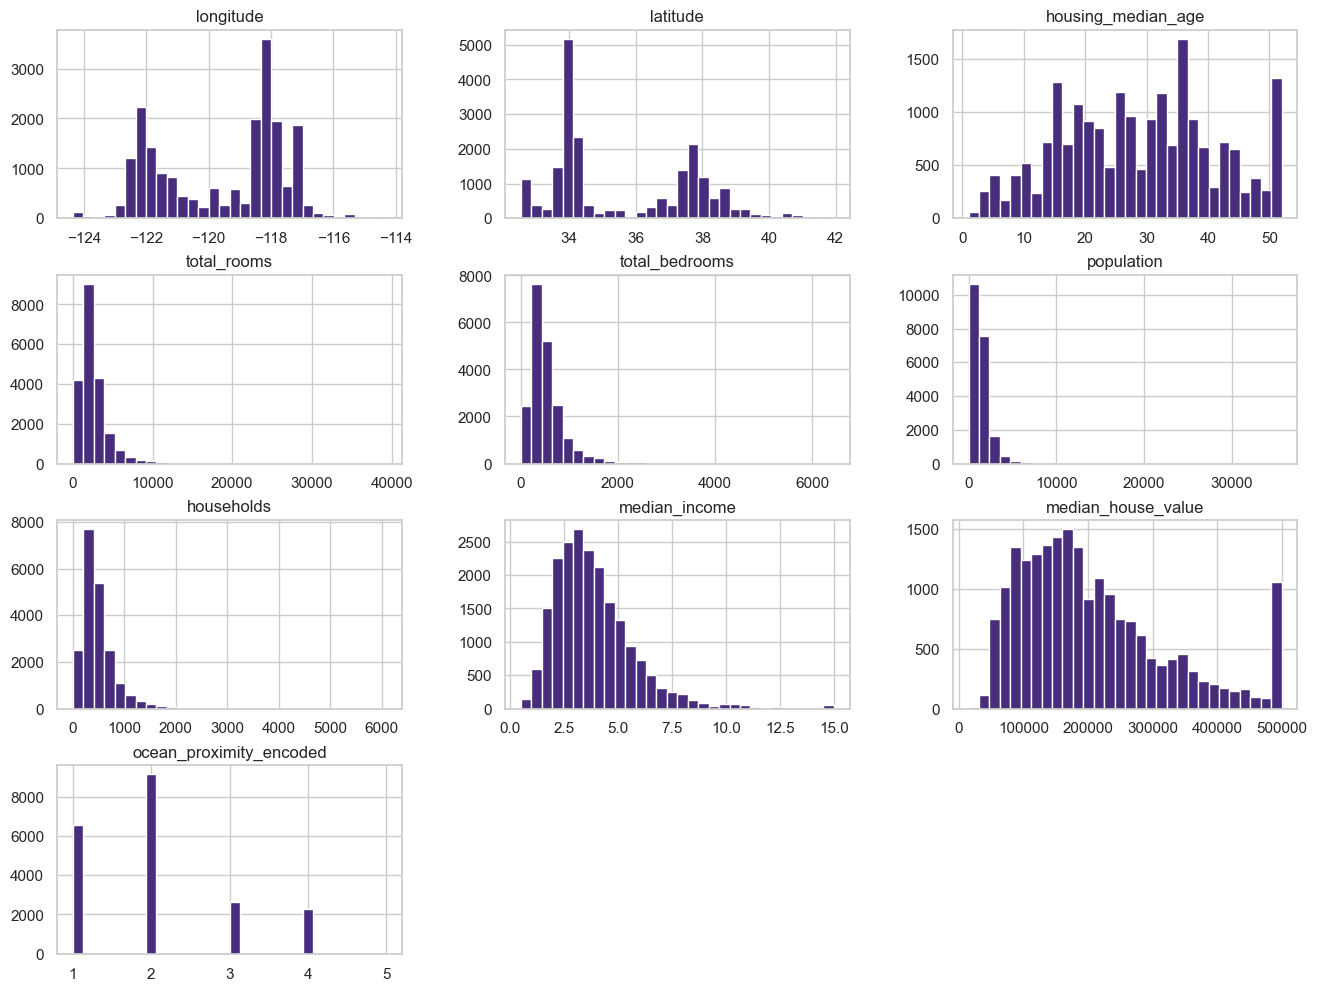

In [598]:
df.hist(bins=30, figsize=(16, 12))

### Observation

The majority of columns exhibit data that aligns with their expected characteristics.
The `median_income` column appears to have been scaled, with values ranging from 0.4999 to 15.0001. Its distribution is positively skewed.
The `median_house_value` column contains outliers, as evident from the histogram.
The columns such as `total_rooms`, `total_bedrooms`, `population`, `households` probably have outliers too. 

Let’s examine the histograms and boxplots of these columns more closely.

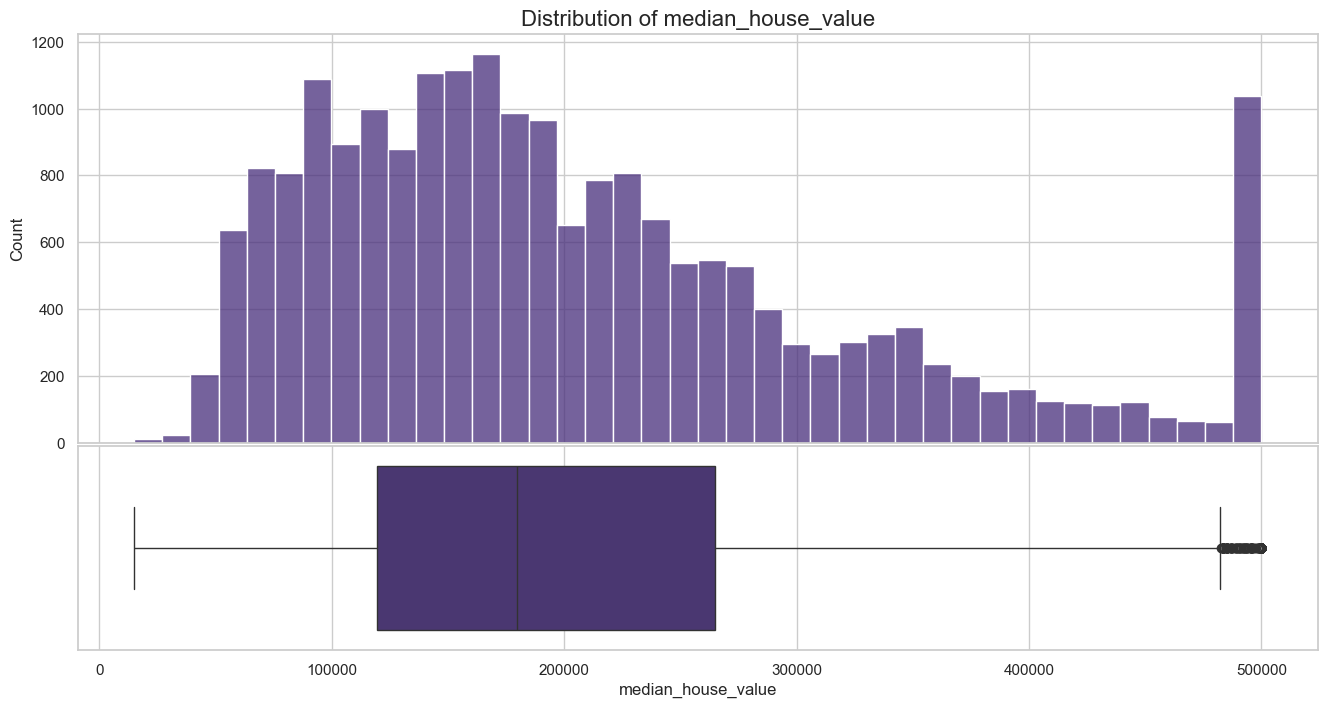

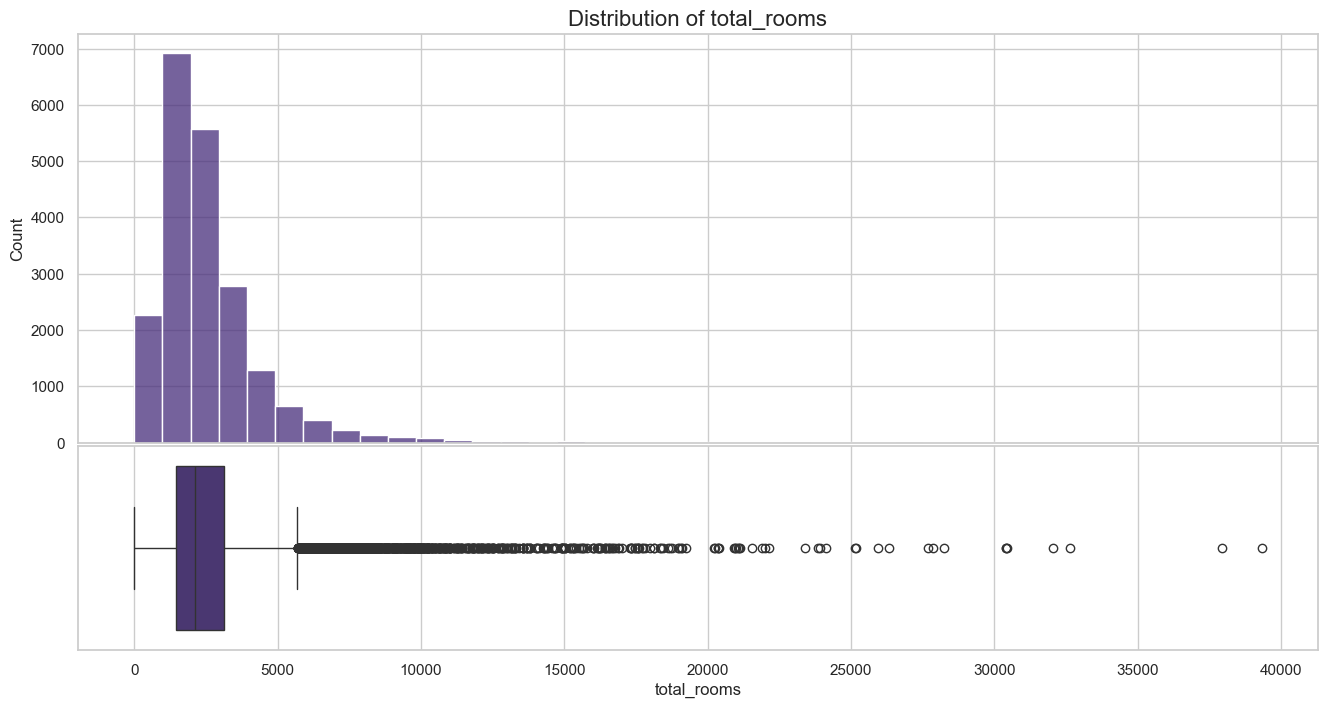

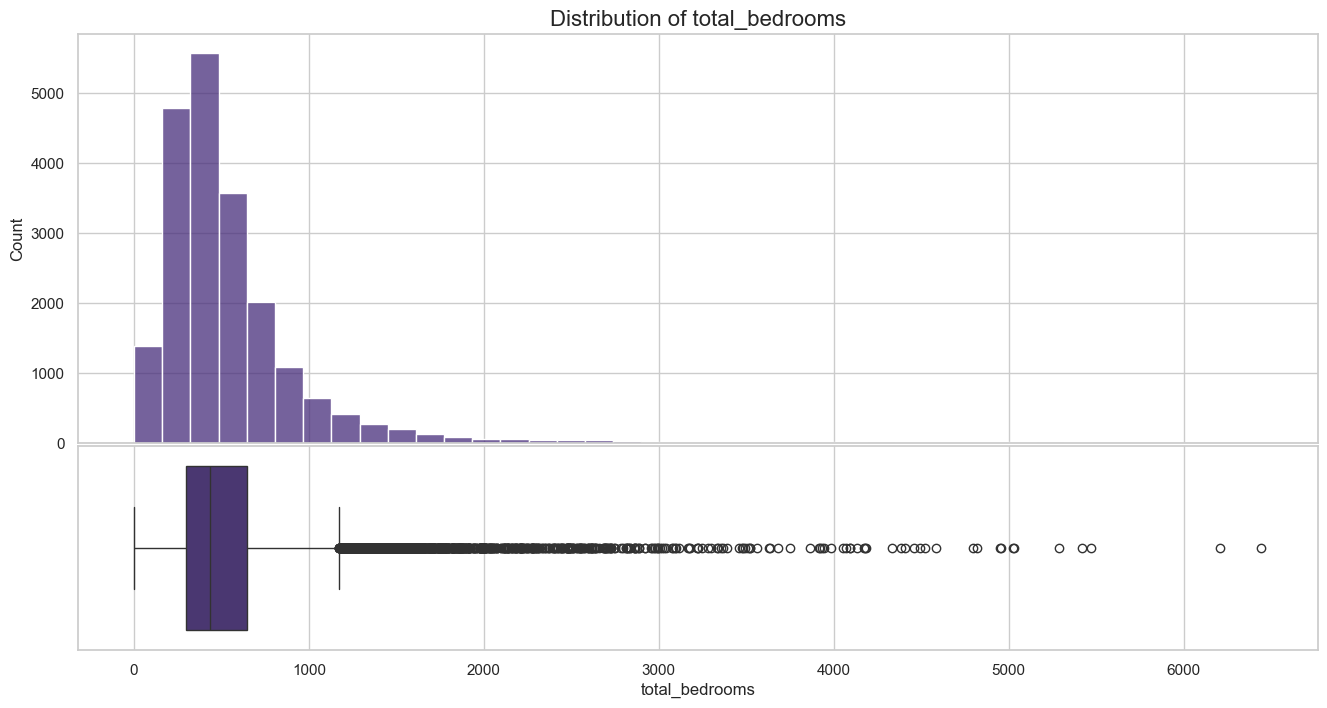

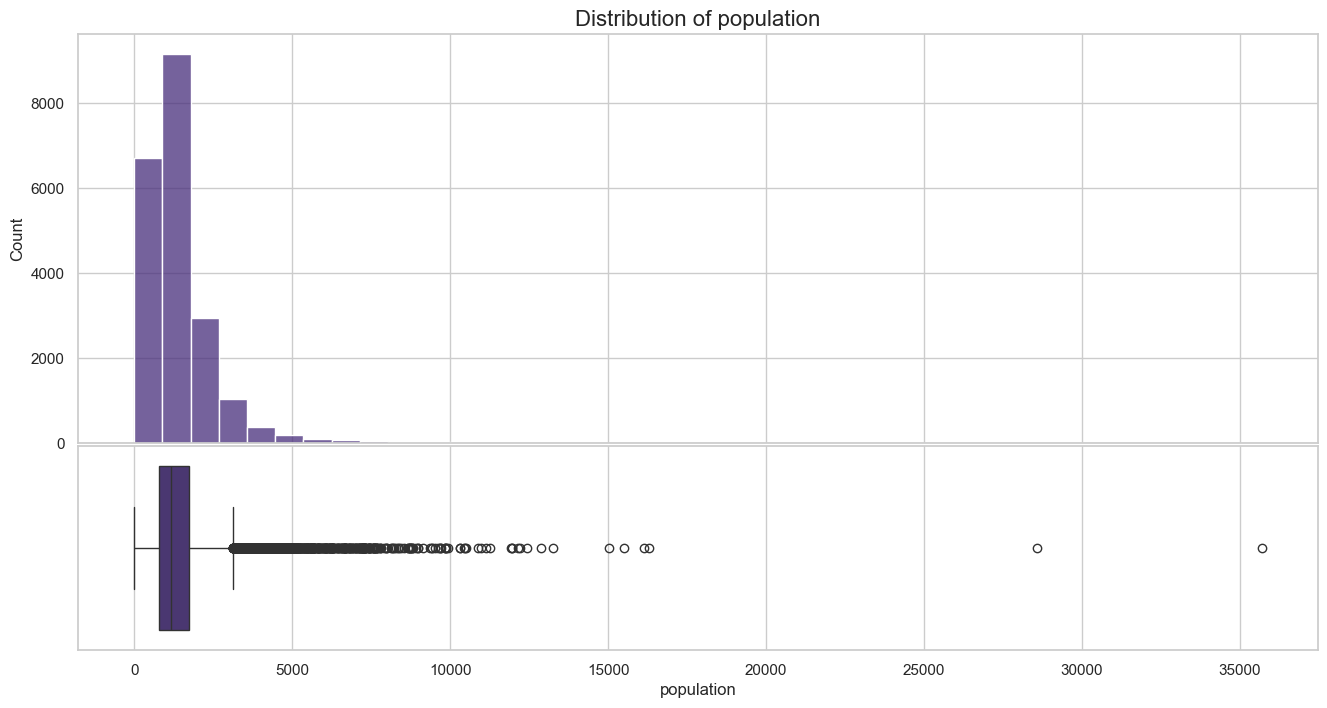

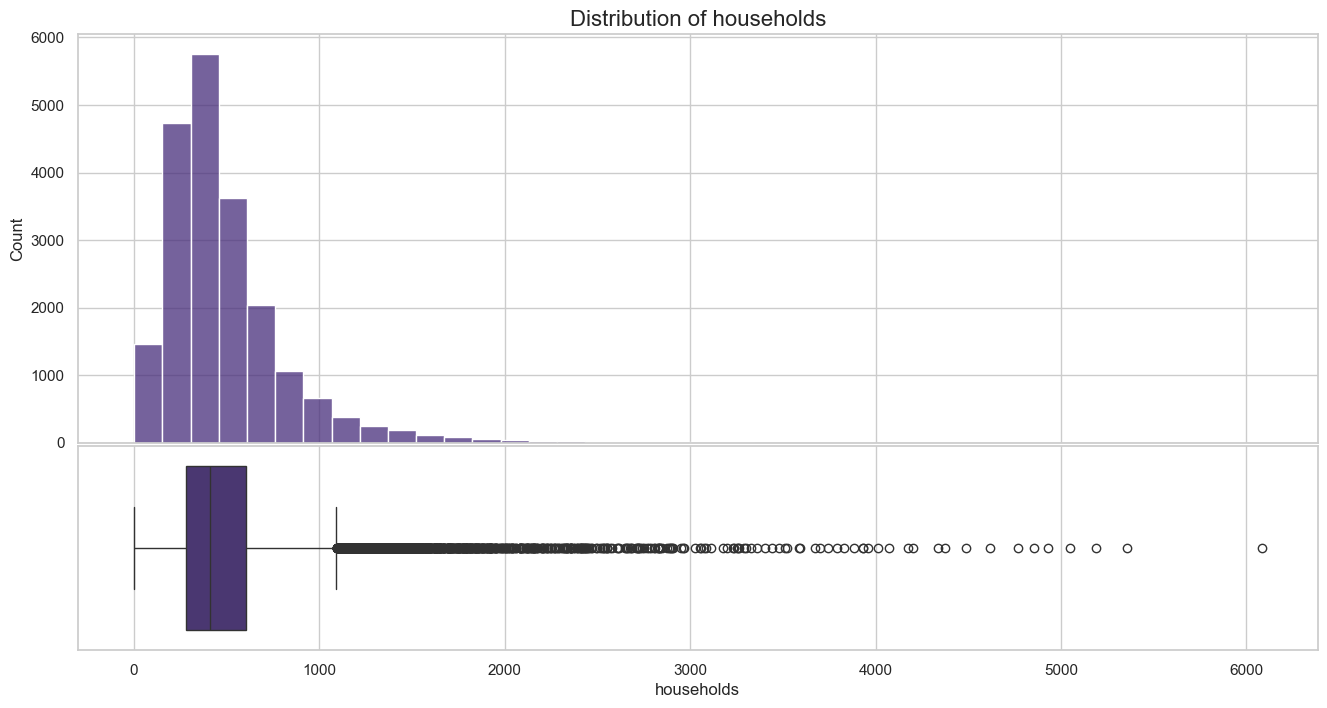

In [599]:
columns = ['median_house_value', 'total_rooms', 'total_bedrooms', 'population', 'households']

def draw_distribution(data, column, bins=20):
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16, 8), gridspec_kw={'height_ratios': [2, 1]})
    plt.subplots_adjust(hspace=0.01)
    ax1.set_title(f'Distribution of {column}', fontsize=16)
    sns.histplot(data=data, x=column, ax=ax1, common_bins=True, bins=bins)
    sns.boxplot(data=data, x=column, ax=ax2)
    plt.show()
    
for col in columns:
    draw_distribution(df, column=col, bins=40)

Let’s explore the relationships between the columns`households`, `total_rooms`, `total_bedrooms`, and `population` using scatter plots. These visualizations will help us understand if there’s any positive correlation among these variables.

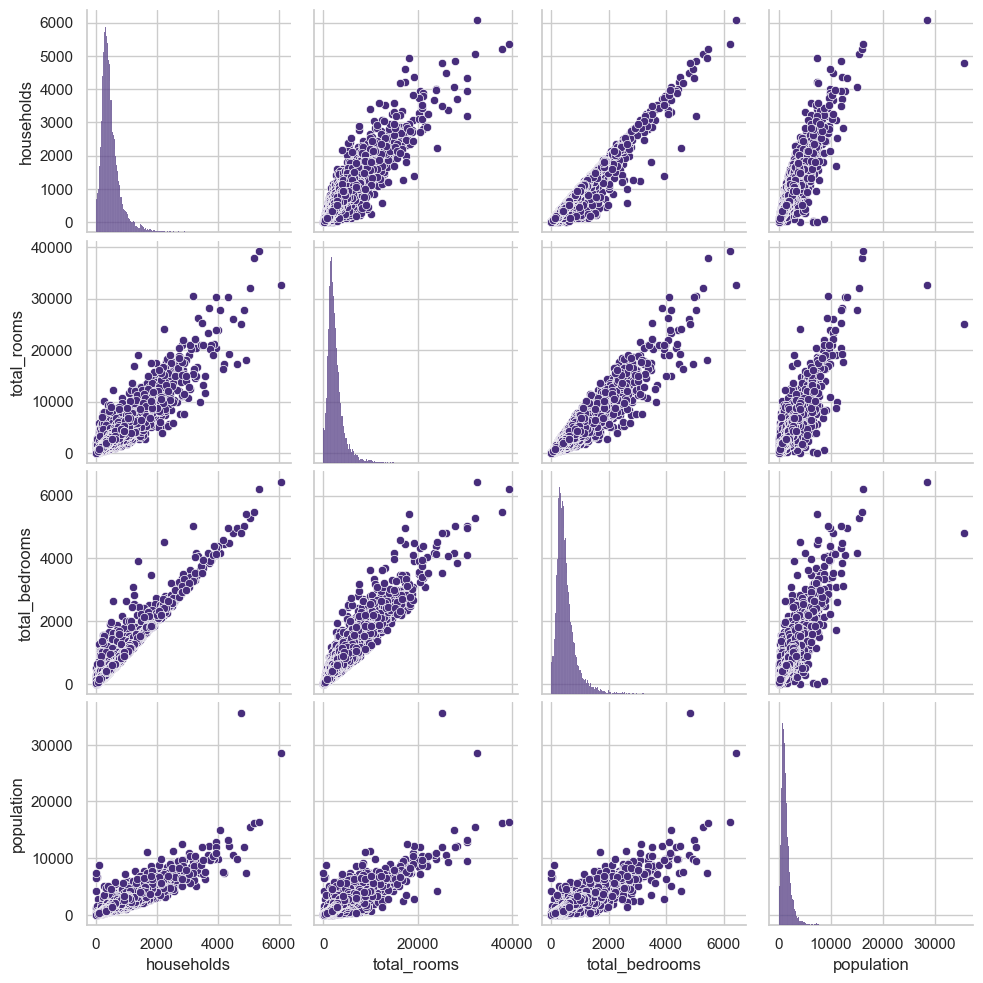

In [600]:
sns.pairplot(df[['households', 'total_rooms', 'total_bedrooms', 'population']])

Let’s address the outliers in the `population` and `median_house_value` columns. We’ll remove any data points that fall outside a reasonable range to ensure more accurate analysis.

In [601]:
columns = ['median_house_value', 'households']

def get_whiskers(dataset):
    q_1 = dataset.quantile(0.25)
    q_3 = dataset.quantile(0.75)
    iqr = q_3 - q_1
    left_whisker = q_1 - 1.5 * iqr
    right_whisker = q_3 + 1.5 * iqr
    return (
        max(dataset.min(), left_whisker),
        min(dataset.max(), right_whisker)
    )

for col in columns:
    min_value, max_value = get_whiskers(df[col])
    df = df[df[col] < max_value].reset_index(drop=True)

## Task 8 
Decide if there are any columns you want to drop. If yes, indicate why with a short sentence.

At this point, we’ll retain all columns except for `ocean_proximity`, since it’s the only categorical variable. However, let’s examine the correlation table to see how the target variable relates to the other variables in our dataset.

In [602]:
df_copy = df.drop('ocean_proximity', axis=1)
def get_corr_for_median_house_value(dataset):
    corr_matrix = dataset.corr()
    sorted_indexes = corr_matrix['median_house_value'].abs().sort_values(ascending=False).index
    return corr_matrix.loc['median_house_value', sorted_indexes]

get_corr_for_median_house_value(df_copy)

median_house_value         1.000000
median_income              0.648029
ocean_proximity_encoded    0.402052
total_rooms                0.197432
latitude                  -0.152798
households                 0.114254
total_bedrooms             0.081306
housing_median_age         0.070323
longitude                 -0.044142
population                -0.006571
Name: median_house_value, dtype: float64

Although only `median_income` has positive moderate correlation with `median_house_value` we are not gonna to drop any of columns.

<Axes: xlabel='longitude', ylabel='latitude'>

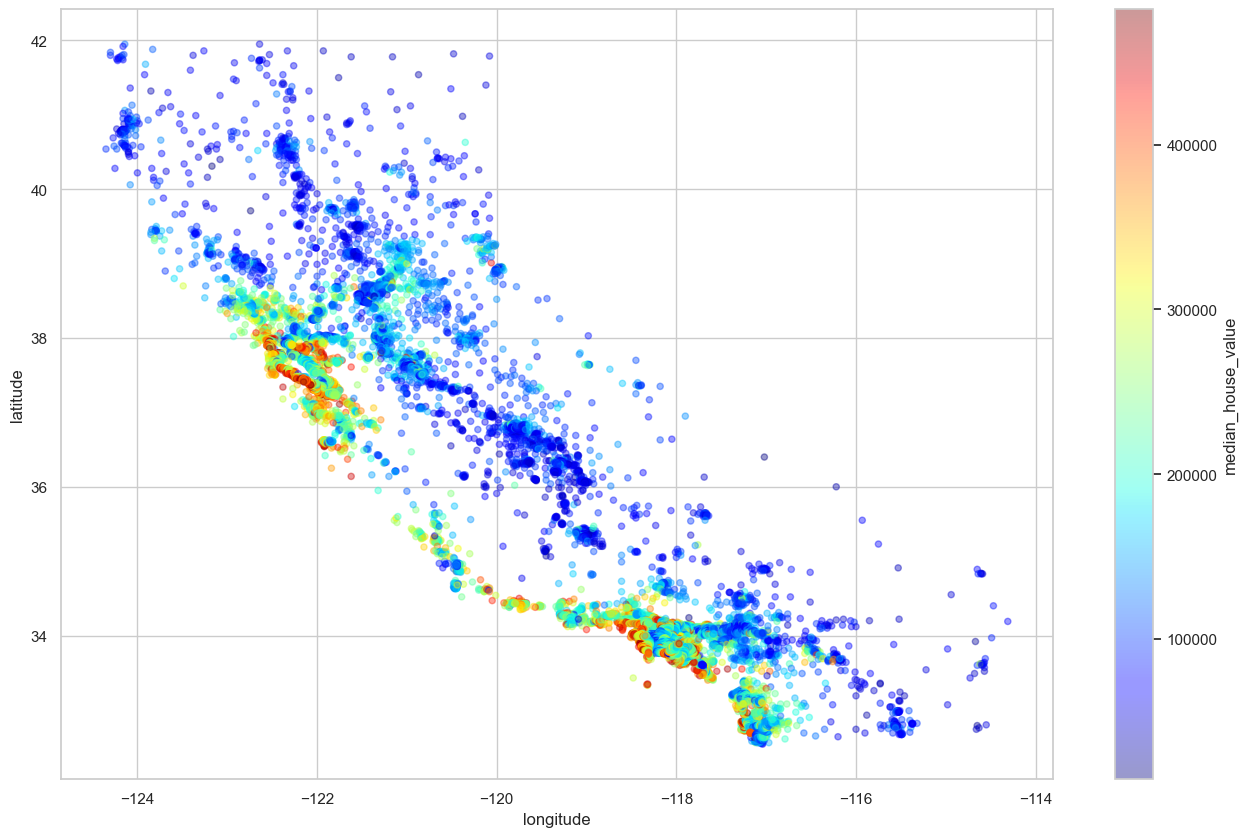

In [603]:
df_copy.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(16, 10),
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

## Task 9
Decide how you want to deal with any missing values. Do you want to drop those rows? Do you want to fill the missing values with 0, or with the column average, or with the column median, or via backfilling or forward-filling? Give a short reason why you chose this method of dealing with missing values.


We've already notice strong positive correlation between `total_rooms` and `total_bedrooms`. So let's use `total_rooms` to fill missing values in `total_bedrooms`.

In [604]:
df_copy['total_bedrooms'].isna().sum()

184

<Axes: xlabel='total_rooms', ylabel='total_bedrooms'>

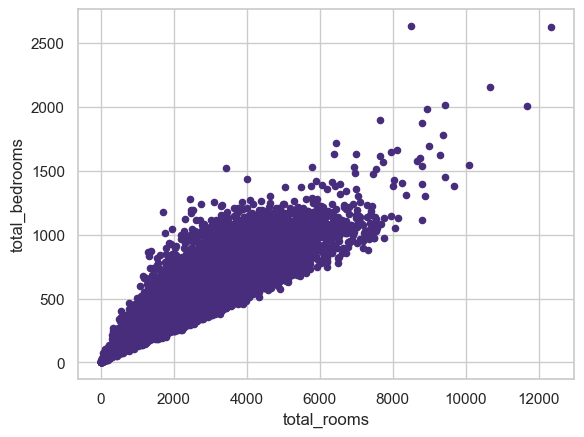

In [605]:
df_copy.plot.scatter(x='total_rooms', y='total_bedrooms')

In [606]:
df_copy['total_rooms'].corr(df_copy['total_bedrooms'])

0.8901014683465333

In [607]:
total_bedrooms = df_copy.sort_values(by='total_rooms')['total_bedrooms'].bfill().copy()
df_copy.loc[total_bedrooms.index, 'total_bedrooms'] = total_bedrooms

Let's check if our manipulations with data impacted the correlation.

In [608]:
df_copy['total_rooms'].corr(df_copy['total_bedrooms'])

0.890218790120856

In [609]:
df_copy['total_bedrooms'].isna().sum()

0

## Task 10
Choose which columns you want to use as your x-columns (i.e., predictor columns). The median_house_value column should be your y-column (i.e., the column you are trying to predict, and the column that contains the ground truth values). 

We will use all columns.

## Task 11
Create a dataset that only contains the x-columns (i.e. predictor columns). Then, create a variable that only contains the values of that dataset.


In [610]:
X = df_copy.drop('median_house_value', axis=1)

## Task 12

Create a variable that only contains the values of the y-column.

In [611]:
y = df_copy['median_house_value']

## Task 13
Use the train_test_split function to split the X and Y variables created in 11. and 12. into training sets and testing sets. A convention is to use 80% of the data for training and 20% for testing. 

In [612]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=random_state)

## Task 14
Bring in the LinearRegression() function. This will be your machine learning model. Use the fit() method from sklearn to fit the model to your data. [More info here: “Specifically, the fit() method takes in a dataset (typically represented as a 2D array or matrix) and a set of labels, and then fits the model to the data”]

In [613]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.6124331645603049

## Task 15
Print out the intercept and coefficients. What do the intercept and coefficients represent? Give a short sentence to explain.

In [614]:
model.score(X_test, y_test)

0.6307676043386883

In [615]:
print(model.intercept_)
print(model.coef_)

-2693236.9333649077
[-3.20735110e+04 -3.22821299e+04  8.86338568e+02 -1.56608385e+01
  1.32384554e+02 -4.13438726e+01  8.78036531e+01  4.01688034e+04
  7.20151500e+03]


### Answer
<img src="./media/img.png">

The ***intercept*** (also known as the **bias term**, $β_{0}$) represents the predicted value of the target variable when all predictor variables (x-columns) are zero. 

The ***coefficients*** (also called **slope coefficients**, $β_{1}$) represent how much the target variable changes for a one-unit change in each predictor variable while holding other predictors constant. Each coefficient corresponds to a specific predictor column.